In [1]:
from PIL import Image

image=Image.open('japan-government-debt-to-gdp.png')
width = image.width
height = image.height
print(width,height)

730 340


In [2]:
image_list = []
black_list=[]
for x in range(height):
    scanline_list = []
    for y in range(width):
        pixel = image.getpixel((y, x))
        scanline_list.append(pixel)
        if pixel==(0, 0, 0, 255):
#             print(x,y,pixel)
            black_list.append([x,y])

    image_list.append(scanline_list)
# print(image_list)

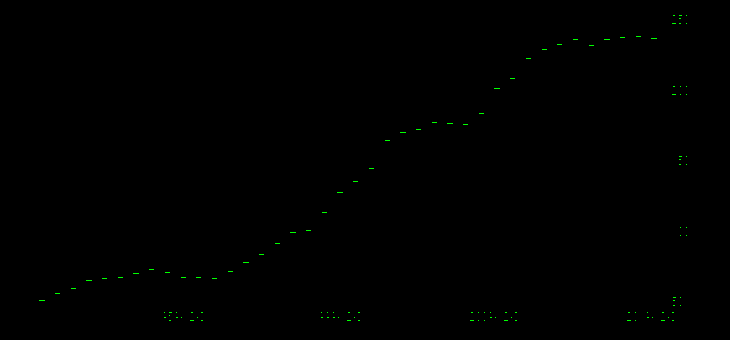

In [3]:
new_pic=Image.new('RGB',(width,height),(0,0,0))
pic=new_pic.load()
for pixel in black_list:
    pic[pixel[1],pixel[0]] = (0,255,0)     # 绿色
new_pic

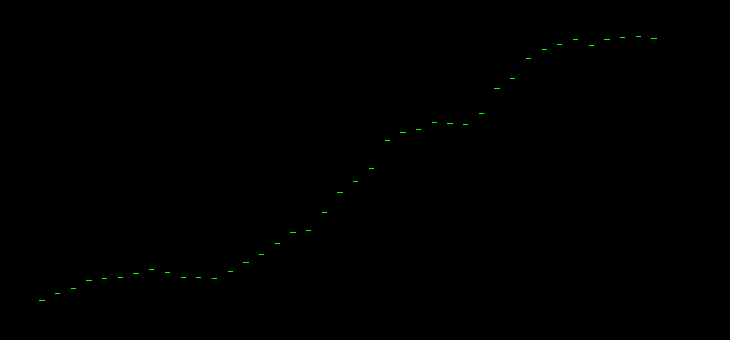

In [5]:
new_pic=Image.new('RGB',(width,height),(0,0,0))
pic=new_pic.load()
for pixel in black_list:
    if pixel[1]>670 or pixel[0]>300:
        continue
    pic[pixel[1],pixel[0]] = (0,255,0)     # 绿色
new_pic

[[36, 636], [37, 620], [38, 651], [39, 573], [39, 604], [44, 557], [45, 589], [49, 542], [58, 526], [78, 510], [88, 494], [113, 479], [122, 432], [123, 447], [124, 463], [129, 416], [132, 400], [140, 385], [168, 369], [181, 353], [192, 337], [212, 322], [230, 306], [232, 290], [243, 275], [254, 259], [262, 243], [269, 149], [271, 228], [272, 165], [273, 133], [277, 118], [277, 181], [277, 196], [278, 102], [278, 212], [280, 86], [288, 71], [293, 55], [300, 39]]


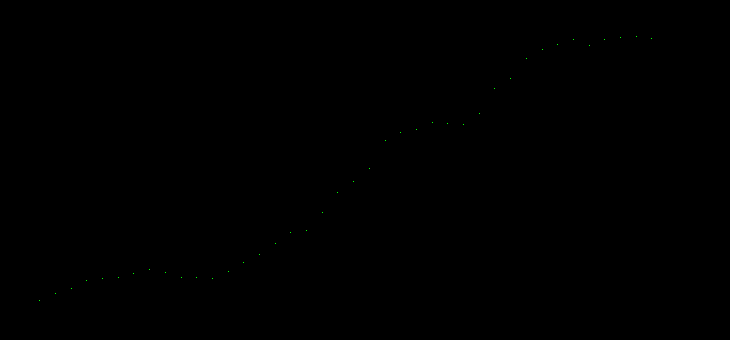

In [7]:
new_pic=Image.new('RGB',(width,height),(0,0,0))
pic=new_pic.load()
data_coor=[]
for pixel in black_list:
    if pixel[1]>670 or pixel[0]>300:
        continue
    if [pixel[0],pixel[1]-1]in black_list:
#         print('xxx')
        continue
#     print(pixel)
    pic[pixel[1],pixel[0]] = (0,255,0)     # 绿色
    data_coor.append(pixel)
print(data_coor)    
new_pic

In [8]:
import pandas as pd
coor_pd=pd.DataFrame(data_coor).sort_values(1,ascending=False)
coor_pd.index=[2019-i for i in range(len(coor_pd))]
coor_pd.columns=['width','height']
coor_pd.head()

,width,height
2019,38,651
2018,36,636
2017,37,620
2016,39,604
2015,45,589


In [9]:
actual_data=[236.6,238.2,237.6,235.6,231.3,236.1,232.5,229,222.1,207.9]

## 使用最近两年的值来估计

此处会发现年份越远误差越大，不可行

In [11]:
y_coor_2019=coor_pd.loc[2019,'width']
y_coor_2018=coor_pd.loc[2018,'width']

print(y_coor_2019,y_coor_2018)

real_2019=236.6
real_2018=238.2

a=(real_2019-real_2018)/(y_coor_2019-y_coor_2018)
b=real_2019-a*y_coor_2019
print(a,b)

38 36
-0.7999999999999972 266.9999999999999


In [12]:
data_pred=[]
for year_height in coor_pd['width']:
#     print(year_height,year_height*a+b)
    data_pred.append(year_height*a+b)
coor_pd['pred']=data_pred
coor_pd.head()

,width,height,pred
2019,38,651,236.6
2018,36,636,238.2
2017,37,620,237.4
2016,39,604,235.8
2015,45,589,231.0


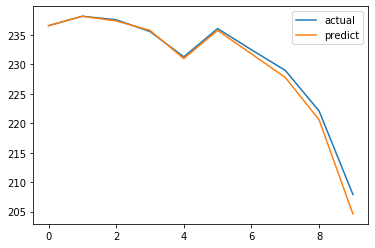

In [13]:
import matplotlib.pyplot as plt
plt.plot(actual_data,label='actual')
plt.plot(coor_pd['pred'][:10].tolist(),label='predict')
plt.legend()
plt.show()


## 使用最大最小值来估算

In [15]:
y_coor_max=min(coor_pd['width'])
y_coor_min=max(coor_pd['width'])

print(y_coor_2019,y_coor_2018)

real_max=238.2
real_min=50.6

a=(real_max-real_min)/(y_coor_max-y_coor_min)
b=real_max-a*y_coor_max
print(a,b)

38 36
-0.7106060606060606 263.78181818181815


      width  height        pred
2019     38     651  236.778788
2018     36     636  238.200000
2017     37     620  237.489394
2016     39     604  236.068182
2015     45     589  231.804545


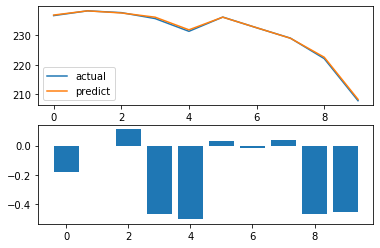

In [16]:
data_pred=[]
for year_height in coor_pd['width']:
#     print(year_height,year_height*a+b)
    data_pred.append(year_height*a+b)
coor_pd['pred']=data_pred
print(coor_pd.head())
import matplotlib.pyplot as plt
import numpy as np
# plt.subplots(2,1)
plt.subplot(2,1,1)

plt.plot(actual_data,label='actual')
plt.plot(coor_pd['pred'][:10].tolist(),label='predict')
plt.legend()

plt.subplot(2,1,2)

plt.bar([i for i in range(10)],np.array(actual_data)-np.array(coor_pd['pred'][:10].tolist()))
plt.show()

## 下面的乱写的


In [17]:
actual_pd=pd.DataFrame(actual_data,index=[2019-i for i in range(10)])
actual_pd

,0
2019,236.6
2018,238.2
2017,237.6
2016,235.6
2015,231.3
2014,236.1
2013,232.5
2012,229.0
2011,222.1
2010,207.9


In [18]:
coor_pd['actual']=actual_pd
coor_pd.drop('actual',axis=1,inplace=True)
coor_pd.head()

,width,height,pred
2019,38,651,236.778788
2018,36,636,238.200000
2017,37,620,237.489394
2016,39,604,236.068182
2015,45,589,231.804545


In [19]:
pd.concat([coor_pd,actual_pd],axis=1).head()

,width,height,pred,0
1980,300,39,50.600000,NaN
1981,293,55,55.574242,NaN
1982,288,71,59.127273,NaN
1983,280,86,64.812121,NaN
1984,278,102,66.233333,NaN


In [20]:
coor_pd.insert(0,'actual',actual_pd)
coor_pd.head()

,actual,width,height,pred
2019,236.6,38,651,236.778788
2018,238.2,36,636,238.200000
2017,237.6,37,620,237.489394
2016,235.6,39,604,236.068182
2015,231.3,45,589,231.804545
